In [ ]:
#ML_Assingment 01_K-medoids clustering
#import libraries
import numpy as np
import pandas as pd
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def kmedoids(data, n_clusters, max_iterations=100):
    n_samples, n_features = data.shape

    # Initialize medoids randomly
    medoid_indices = np.random.choice(n_samples, size=n_clusters, replace=False)
    medoids = data[medoid_indices]

    for _ in range(max_iterations):
        # Assign each data point to the nearest medoid based on Manhattan distance
        labels = np.argmin(np.array([[manhattan_distance(data[i], medoids[j]) for j in range(n_clusters)] for i in range(n_samples)]), axis=1)

        # Update medoids
        new_medoids = np.copy(medoids)
        for i in range(n_clusters):
            cluster_points = data[labels == i]
            total_distances = np.sum(np.array([np.sum(np.abs(cluster_points - point), axis=1) for point in cluster_points]), axis=1)
            new_medoid_index = np.argmin(total_distances)
            new_medoids[i] = cluster_points[new_medoid_index]

        # Check for convergence
        if np.all(new_medoids == medoids):
            break

        medoids = new_medoids

    return labels, medoids

# Generate some random data points for demonstration
data = pd.read_csv('/content/cancer.csv')
attributes=data.drop(columns=['id','diagnosis','Unnamed: 32'])
data=attributes.values

# Number of clusters
n_clusters = 2

# Apply KMedoids clustering
cluster_labels, cluster_medoids = kmedoids(data, n_clusters)

# Print cluster assignments and medoid points
for cluster_id in range(n_clusters):
    cluster_points = data[cluster_labels == cluster_id]
    print(f"Cluster {cluster_id + 1} - Medoid: {cluster_medoids[cluster_id]}")
    print(cluster_points)
    print()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

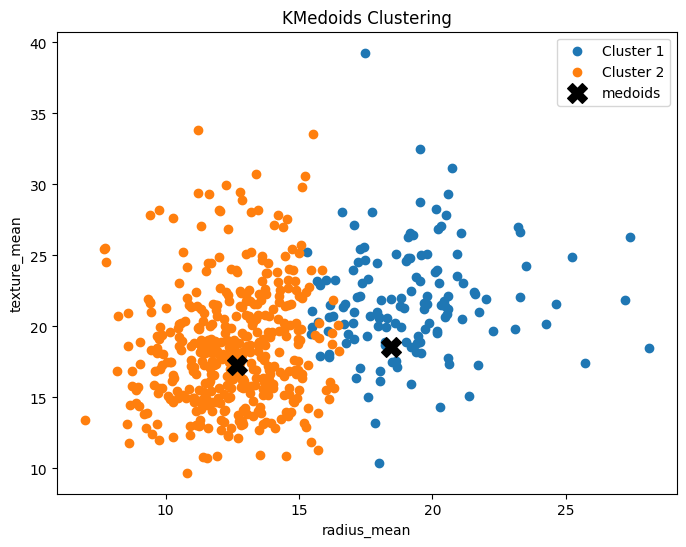

In [ ]:
# Get cluster assignments
import matplotlib.pyplot as plt
# Create a scatter plot for each cluster
plt.figure(figsize=(8, 6))

for cluster_id in range(n_clusters):
    cluster_points = data[cluster_labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}")
plt.scatter(cluster_medoids[:,0], cluster_medoids[:,1], marker='X', s=200,c='black', label='medoids')

plt.title("KMedoids Clustering")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [ ]:
k_medoids_counts=np.bincount(cluster_labels)
print("K-Medoids Cluster Counts:",k_medoids_counts)

K-Medoids Cluster Counts: [140 429]
